Antrą pamoką daug laiko skyriau aiškinimuisi, kas yra elektronas ir kokie procesai vyksta su elektronais, cheminių reakcijų metu, tekant elektros srovei, elektros iškrovų metu ar įelektrintuose paviršiuose. Šias žinias iki galo suprasti atrodo sunku taip pat ir Simonui, nes elektronas - tai kartu ir kvantinė (bangos savybių turinti) dalelė, ne tik besisukanti ratu aplink protoną, bet ir išdarinėjanti keisčiausius fokusus, tokius, kaip fotono išspinduliavimas peršokant į kitą sluoksnį. Vienintelis būdas suprasti, kas gi čia vyksta, yra eksperimentų atlikimas. Kvantinio mikroskopo mes neturime galimybių nusipirkti, todėl telieka ieškoti informacijos, kurią būtų įmanoma suprasti. Norint suprasti, galima:

* **Eksperimentų simuliacijos**. Stebėti, kaip keičiasi sistemos elgesys, kai keičiame tam tikrus jos parametrus. Tai galima daryti kai kuriuose žemiau pateiktuose eksperimentuose.
* **Eksperimentų analogai**. Ieškoti, su kokiomis jau žinomomis sistemomis turi panašumų tiriama sistema. Tam reikia vaizduotės, kruopštaus, smulkmeniško mąstymo. Pavyzdžiui kuo elektrono judėjimas aplink atomo branduolį yra panašus į planetų judėjimą aplink Saulę ir kuo skiriasi?

### Eksperimentų simuliacijos
Pamėginsiu išnaudoti Jupyter Notebook galimybes, kad atlikčiau pačias paprasčiausias simuliacijas.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

1\. Kokia trajektorija juda dviratininko rato ventilis važiavimo metu?

In [7]:
%matplotlib inline
brėžk_ventilį()

2\. Kaip juda molekulė ore, kai oro sklinda garso banga? Nubrėžkite grafiką, kuriame pavaizduota molekulės nukrypimo nuo pusiausvyros padėties priklausomybė nuo laiko.

In [8]:
%matplotlib inline
animate_oscillation()

3\. Tarkime netoli planetos X praskrieja asteroidas. Į kurią pusę bus nukreipti asteroido greičio ir pagreičio vektoriai? Kiekvienu nauju laiko momentu nauja asteroido pozicija yra perskaičiuojama atsižvelgiant į greičio vektorių, pagreičio vektorių ir poziciją ankstesniu momentu. Kokia bus tolimesnė jo judėjimo trajektorija? Į asteroido sąveikavimą su planetos X atmosfera neatsižvelgiama. 

***Šios animacijos veikimas nuorodoje nepalaikomas***

<IPython.core.display.Javascript object>


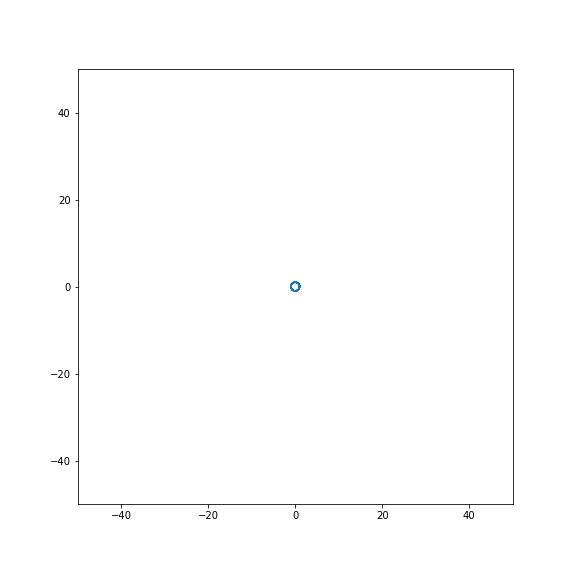

In [24]:
%matplotlib notebook
display(brėžk_asteroidą(4.5, 0.5, 5.7, planet_radius=1, t=0.25, S=90))
#h - pradinis aukštis
#v - paleidimo greitis
#g - gravitacijos stiprumas
#planet_radius - planetos spindulys
#t - laiko tarpas tarp dviejų perskaičiavimų

4\. Pagal klasikinį Boro modelį elektronai gali išsidėstyti tik tam tikrais sluoksniais apie atomo branduolį (orbitalėmis). Tačiau remiantis kvantine fizika, elektronas turi ne tik dalelės savybes, bet ir bangos savybes. 
Kvantas - tai tam tikras diskretus energijos kiekis, kurį yra įgyjęs elektronas. Jo reikšmė lemia į kurį sluoksnį yra peršokęs elektronas. Peršokimą gali lemti tik energijos sugėrimas arba išspinduliavimas. Laikydami, kad visais atvejais elektronas sukasi banguodamas vienodo ilgio bangomis apie skirtingo spindulio apskritas linijas (sluoksnius), pavaizduokite jo galimas trajektorijas.

***Modelis prieinamas [šioje nuorodoje](https://www.geogebra.org/m/gRr42F9N#material/HjhJaZXm)***

5. Apibūdinkite garsųjį dviejų plyšių eksperimentą, įrodžiusį, kad elektronas elgiasi kaip banga

***Atsakymas - [Mokslo Sriuboje](http://www.youtube.com/watch?v=hyP06TAMhHo&t=4m20s)***. Siūlau peržiūrėti visą įrašą nuo pradžių iki galo.

6. Kaip keičiasi stebimi dalelės matmenys, kai ji skrenda artišviesiniu greičiu?

***Atsakymas - [Einšteino reliatyvumo teorijos paaiškinime](https://www.youtube.com/watch?v=ev9zrt__lec)***

7. Kaip atrodo oro dalelių virpėjimas paprasčiausiuose signaluose? Atsakymą parodysiu per pamoką.
8. Nuo ko priklauso švytuoklės judėjimas: nuo svarmens masės, paleidimo greičio ar siūlo ilgio?

### Dydžiai, formulės ir kita
Mintiniai ir kiti eksperimentai yra nepakeičiama priemonė įsimenant įvairius fizikinius dėsnius. Tačiau virš 80% fizikos kurso - formulių taikymas. Norint lengvai įsiminti didelius kiekius formulių siūlau dvi išeitis:

* Susipažinti su dimensijos sąvoka, pateikta metronomijos žodyne.
* Susipažinti su tekstinių uždavinių, kuriuose pasitaiko dauginimai ir dalijimai, pavyzdžiais iš realaus gyvenimo (t.y. apžvelgti jų klasifikaciją.

Šiomis abejomis temomis rašau savo [baigiamajame darbe](MamaitisSimonasBD2021.pdf) 2.1 ir 2.3 poskyriuose.

### Kodų skiltis
Norint leisti animacijas, reikia kodo. Čia jį prikabinu tam, kad nepasimestų. [Funkcijų aprašymai yra paleidžiami prieš kodo vykdymą].

**Ventilio kodas**

In [2]:
import matplotlib.animation
from IPython.display import HTML

def brėžk_ventilį():
    #S = total number of samples, r = radius, d = length of path it moves
    S, r, d = 75, 2, 12*np.pi
    fig = plt.figure(figsize=(20,5))
    ax = plt.axes(xlim=(-r, d+r), ylim=(-1.5*r, 1.5*r))
    ax.plot((-r, d+r), (-r, -r), color='b') #immutable [path] artist
    line, = ax.plot([], [], color='g') #set updatable [green wheel] artist
    ventile = ax.scatter(0, -r, s=100, color='r', zorder=1000, edgecolors='k') #set updatable [red dot] artist
    direction, = ax.plot((0,0),(0,-r), color='k') #set updatable [black center to ventile line] artist
    t = np.linspace(0, 2*np.pi, 70) 
    circle = (np.cos(2 * np.pi * t), np.sin(2 * np.pi * t)) #define a unit circle that depends on parameter t
    ax.set_aspect('equal')

    def animate(i, r, d): #sample id, circle radius, length of path it moves
        distance = d*i/S
        x, y = r*circle[0] + distance, r*circle[1]
        angle = -np.pi/2 + distance/r
        line.set_data(x, y) #update [green wheel]
        direction.set_data((distance, distance - r*np.cos(angle)), (0, r*np.sin(angle))) #update [center to ventile line]
        ax.scatter(distance - r*np.cos(angle), r*np.sin(angle), color='lightblue') #put a trace of trajectory
        ventile.set_offsets((distance - r*np.cos(angle), r*np.sin(angle))) #update [red dot]

    anim = matplotlib.animation.FuncAnimation(fig, func=lambda i,r=r,d=d: animate(i,r,d), 
                                             frames=S+1, interval=100)
    plt.close()
    return HTML(anim.to_jshtml())

**Oro bangos kodas**

In [3]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

def animate_oscillation():
    amplitude, gamma, omega0 = 1.0, 0.1, 1.0 # Oscillator parameters
    tmin, tmax, nt = 0., 50., 200            # Animation parameters
    nframes, frame_dt = 100, 40
    tmin_plt, xlim = -5, 1.2                 # Axis limits
    circ_pos = -2

    ## Set up the drawing area
    fig = plt.figure(figsize=(8,4))
    plt.xlim(tmin_plt, tmax)
    plt.ylim(-xlim, xlim)

    ## Draw the static parts of the figure
    t = np.linspace(tmin, tmax, nt)
    x = amplitude * np.exp(-gamma*t) * np.cos(np.sqrt(omega0**2 - gamma**2)*t)
    plt.plot(t, x, color='blue', linewidth=2)
    plt.title('Motion of a damped harmonic oscillator.')
    plt.xlabel('miliseconds')
    plt.ylabel('deflection')

    ## Initialize the plot objects to be animated (`line', `circ', `dash')
    ## with empty plot data.  They'll be used by the `animate` subroutine.
    line, = plt.plot([], [], color='grey', linewidth=2)
    circ, = plt.plot([], [], 'o', color='red', markersize=15)
    dash, = plt.plot([], [], '--', color='grey', markersize=15)
    plt.close()

    ## Initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        circ.set_data([], [])
        dash.set_data([], [])
        return line, circ, dash

    ## Animation function. This is called sequentially for different integer n, running from 0 to nframes-1 (inclusive).
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = amplitude * np.exp(-gamma*t) * np.cos(np.sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc)
        dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # Call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=frame_dt, blit=True)
    return animator

**Asteroido kodas**

In [80]:
import ipywidgets as widgets

def brėžk_asteroidą(h, v, g, planet_radius=1, t=0.1, S=5000): #S is maximum number of recalculations
    def fly(coords, velocity, t=0.05, gravity=1, planet_radius=1):
        i=0
        starting_angle = np.rad2deg(np.arctan2(*coords[::-1]))
        while i<S:          
            yield coords
            s1 = velocity * t
            s2 = - coords / np.hypot(*coords) * (gravity / np.hypot(*coords)**2) * t*t/2 #gravity times half of t^2
            coords, velocity = coords + s1 + s2, (s1 + s2)/t
            if np.hypot(*coords) <= planet_radius:
                yield coords
                break
            if starting_angle + 10>np.rad2deg(np.arctan2(*coords[::-1]))>starting_angle:
                break
            if not -50 <= coords[0] <=50: 
                break
            if not -50 <= coords[1] <=50: 
                break
            i+=1
        
    def update(a):
        fig = plt.figure(figsize=(8, 8))
        plt.xlim(-50, 50)
        plt.ylim(-50, 50)
        p = np.linspace(0, 2*np.pi, 1000)
        plt.plot(planet_radius * np.cos(2 * np.pi * p), planet_radius* np.sin(2 * np.pi * p))
        #ax.set_aspect('equal')
        line, = plt.plot([], [], 'o', color='green', markersize=2)
        c1, c2 = zip(*fly(np.array([-3, a]), np.array([v, 0]), t=t, gravity = g, planet_radius=planet_radius))
        line.set_data(c1, c2)
        
    int_slider = widgets.IntSlider(value=1, min=0, max=20, step=1, description='height', continuous_update=False, orientation='vertical')
    w = widgets.interactive(update, a = int_slider)
    box_layout = widgets.Layout(display='flex', flex_flow='row', justify_content='flex-start', align_items='center')
    return widgets.HBox([w.children[1],w.children[0]], layout=box_layout)
    # params:
    #'flex-start', 'flex-end', 'center', 'space-between', 'space-around', 'inherit', 'initial', 'unset'

In [81]:
%matplotlib notebook
brėžk_asteroidą(4.5, 0.5, 5.7, planet_radius=1, t=0.05)